## 1. What are the smallest breakpoints and d_vc for the three hypotheses in Example 2.2 of the book?


**a.) Positive Rays:** m<sub>h</sub>(N) = N + 1:
By solving numerically, we get:<br />
N + 1 $\leq$ 2<sup>N</sup> <br />
(N = 1) => 2 $\leq$ 2 ❌ (H still shattered)<br />
(N = 2) => 3 $\leq$ 4 ✅ (N is a breakpoint)<br />
Thus, our smallest breakpoint is **N = 2** and our **d<sub>vc</sub> = 1**
___

**b.) Positive Intervals:**  m<sub>h</sub>(N) = $\frac{N^2}{2}$ + $\frac{N}{2}$ + 1:
By solving with a simple python scipt, we are able to deduct that:

In [16]:
def pos_interval_bp():
    for N in range(100):
        if ( (N**2 / 2) + N/2 + 1 ) < 2**N:
            return N
    return -1
print("N =", pos_interval_bp())
        

N = 3


**N = 3** is our smallest breakpoint and thus our **d<sub>vc</sub> is 2.**
___


**c.) Convex Sets:** In the case of convex sets, there are sets of points in which no convex hypothesis would be able to shatter them, however because m<sub>h</sub>(N) is only concerned with the worst case, then there is no set of N points that cannot be shattered. Thus: <br />
**N = ∞** and **d<sub>vc</sub> is ∞.**
___

## 2. Enumerate all dichotomies for n points for which:

**a.) n = 4 and no 1 point is shattered:** This produces 1 dichotomoy. 

| x_1         | x_2         | x_3        | x_4 |
| ----------- | ----------- | ---------- | ----------  |
|  ⭕️  |    ⭕️     |   ⭕️   |    ⭕️     |


**b.) n = 4 and no 2 points are shattered:** This produces 5 dichotomies.

| x_1         | x_2         | x_3        | x_4 |
| ----------- | ----------- | ---------- | ---------- |
|  ⭕️         |    ⭕️       |   ⭕️      |    ⭕️     |
|  🔴         | ⭕️          |   ⭕️      |     ⭕️    |
|  ⭕️         | 🔴          |   ⭕️      |     ⭕️    |
|  ⭕️         | ⭕️          |   🔴      |     ⭕️    |
|  ⭕️         | ⭕️          |   ⭕️      |     🔴    |


**c.) n = 5 and no 2 points are shattered:** This produces 6 dichotomies

| x_1         | x_2         | x_3        | x_4        | x_5 |
| ----------- | ----------- | ---------- | ----------| ----------|
|  ⭕️         |    ⭕️       |   ⭕️      |    ⭕️     |    ⭕️     |
|  🔴         | ⭕️          |   ⭕️      |     ⭕️    |     ⭕️    |
|  ⭕️         | 🔴          |   ⭕️      |     ⭕️    |     ⭕️    |
|  ⭕️         | ⭕️          |   🔴      |     ⭕️    |     ⭕️    |
|  ⭕️         | ⭕️          |   ⭕️      |     🔴    |     ⭕️   |
|  ⭕️         | ⭕️          |   ⭕️      |     ⭕️    |     🔴   |

**d.) Does B(n,k) $\leq$ B(n-1,k) + B(n-1,k-1) hold?** <br />
Yes, B(5,2) $\leq$ B(4,2) + B(4,1) because: <br />
B(5,2) = 6 <br />
B(4,2) = 5 <br />
B(4,1) = 1 <br />
___

## 3. Problem set up

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
X = np.arange(-1.,1.,0.01) #create X vector grid

**Define functions to create our data:**

In [19]:
def get_data_part_a(): #run experiement 1000 times to get g_D(x)
    g_D = np.zeros((1000,len(X))) # array to store the value of the g_D(x) for part A
    ## Data generation: repeat for 1000 iterations
    for rep in range(1000): 
        # Sample (x1,y1) and (x2,y2)
        x1, x2 = np.random.uniform(-1.,1.,2)
        y1, y2 = np.sin(np.pi*x1), np.sin(np.pi*x2)
        # Optimal hypothesis g_D(x) for part A:
        g_D[rep,:] = (y1-y2)/(x1-x2)*X + (x1*y2-x2*y1)/(x1-x2)
    return g_D

def get_data_part_c(): #run experiement 1000 times to get g_D(x)
    g_D = np.zeros((1000,len(X))) # array to store the value of the g_D(x) for part c
    ## Data generation: repeat for 1000 iterations
    for rep in range(1000): 
        # Sample (x1,y1) and (x2,y2)
        x1, x2 = np.random.uniform(-1.,1.,2)
        y1, y2 = np.sin(np.pi*x1), np.sin(np.pi*x2)
        # Optimal hypothesis g_D(x) part c:
        g_D[rep,:] = (y1+y2)/2
    return g_D

**Create Plotting Function:**

In [20]:
def plot_g_bar(np_array,g_bar,part_lbl): #only plotting g_D(x), g_bar, and f(x) right now till bias and variance are fixed.
    for val in np_array: #plot all g_D(x)
        plt.plot(X,val,"green",linewidth=0.3,alpha=0.5)
    plt.plot(X,np.sin(np.pi*X),"black",label='y=sin(pi * x)') #plot f(x) after g_D(x) to see f(x) better
    plt.plot(X,g_bar, "red", label="g_bar",linewidth=2) #plot g_bar
    if part_lbl == "a":
        title = "Part A: g_D(x) = (y1-y2)/(x1-x2)*X + (x1*y2-x2*y1)/(x1-x2)"
    else:
        title = "Part C: g_D(x) = (y1+y2) / 2"
    plt.title(title)
    plt.legend(loc='best')
    plt.ylim(-2,2)
    plt.show()

def plot_bias_var(bias,var,part_lbl): #only plotting g_D(x), g_bar, and f(x) right now till bias and variance are fixed.
    for val in bias: #plot all g_D(x)
        plt.plot(X,val,"y",linewidth=0.3,alpha=0.5)
    for val in var: #plot all g_D(x)
        plt.plot(X,val,"b",linewidth=0.3,alpha=0.5)
    plt.plot(X,np.sin(np.pi*X),"black",label='y=sin(pi * x)') #plot f(x) after g_D(x) to see f(x) better
    if part_lbl == "a":
        title = "Part A: g_D(x) = (y1-y2)/(x1-x2)*X + (x1*y2-x2*y1)/(x1-x2)"
    else:
        title = "Part C: g_D(x) = (y1+y2) / 2"
    plt.title(title)
    plt.legend(("Bias - Yellow", "Variance - Blue"),loc='best')
    plt.ylim(-2,2)
    plt.show()

**Get our data for each problem:**

In [21]:
a_data, c_data = get_data_part_a(), get_data_part_c()

**Define General Functions:**

In [22]:
def get_E_out(np_array):
    e_out_array = np.zeros((1000,len(X)))
    for i,v in enumerate(np_array):
        e_out_array[i,:] = np.square(np.absolute(np.sin(np.pi * X) - v) )
    avg_e_out = np.average(e_out_array)
    return e_out_array, avg_e_out

def get_g_bar(np_array):
    g_bar = sum(np_array) / len(np_array)
    return g_bar

def get_var(np_array, g_bar):
    var_array = np.zeros((1000,len(X)))
    for i,v in enumerate(np_array):
        var_array[i,:] = np.square(v) - np.square(g_bar)
    avg_var = np.average(var_array)
    return var_array, avg_var

def get_bias(np_array,g_bar):
    bias = np.zeros((1000,len(X)))
    for i,v in enumerate(np_array):
        bias[i,:] =  np.square(g_bar - np.sin(np.pi * X))
    avg_bias = np.average(bias)
    return bias,avg_bias



**Get information about our data for each problem:**

In [23]:
a_error, a_avg_error = get_E_out(a_data)
a_g_bar = get_g_bar(a_data)
a_var, a_avg_var = get_var(a_data,a_g_bar)
a_bias,a_avg_bias = get_bias(a_data,a_g_bar)

In [24]:
c_error, c_avg_error = get_E_out(c_data)
c_g_bar = get_g_bar(c_data)
c_var, c_avg_var = get_var(c_data,c_g_bar)
c_bias,c_avg_bias = get_bias(c_data,c_g_bar)

**Plot E<sub>out</sub>,  Bias, $\bar{g}$(x), and Variance for each problem**

**Part A results:**

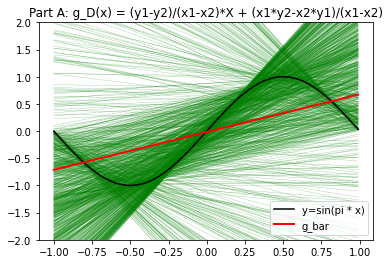

In [25]:

plot_g_bar(a_data,a_g_bar, "a")


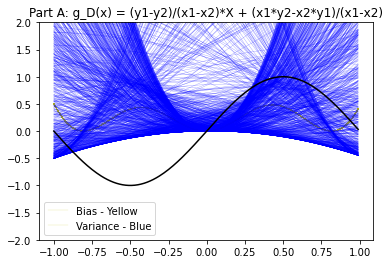

In [26]:
plot_bias_var(a_bias,a_var,"a")

In [27]:
print("E_out = ",a_avg_error)
print("Variance = ",a_avg_var)
print("Bias = ",a_avg_bias)

E_out =  2.079136361639373
Variance =  1.860065245248217
Bias =  0.21907111639115615


**Part C Results:**

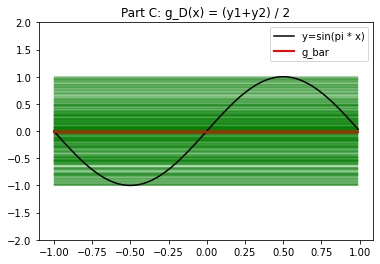

In [13]:
plot_g_bar(c_data,c_g_bar, "c")

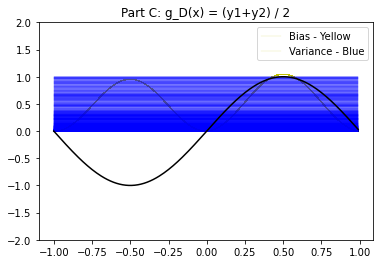

In [14]:
plot_bias_var(c_bias,c_var,"c")

In [15]:
print("E_out = ",c_avg_error)
print("Variance = ",c_avg_var)
print("Bias = ",c_avg_bias)

E_out =  0.7536565311121878
Variance =  0.25312543714287433
Bias =  0.5005310939693136
